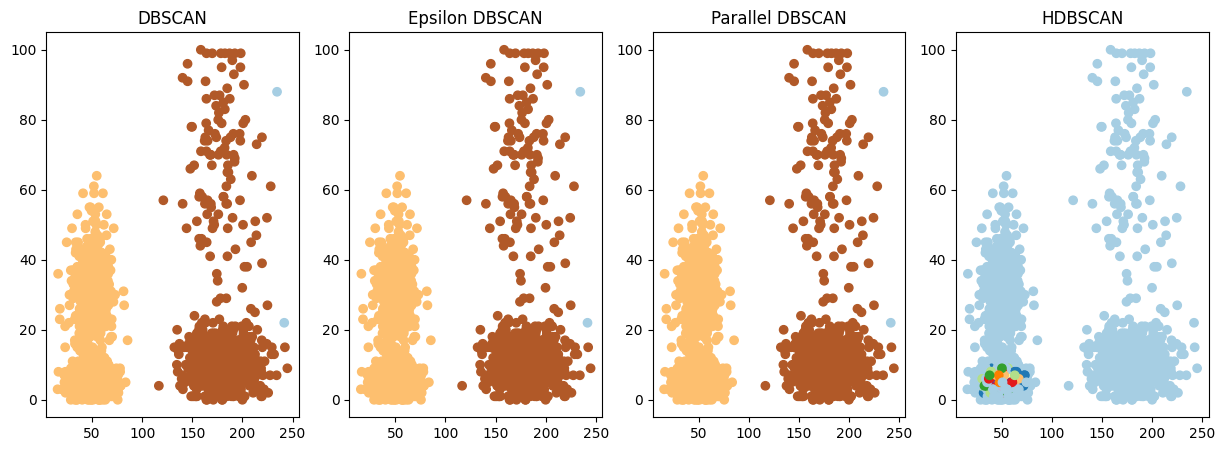

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import hdbscan

path = "Data\\"

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv(path + 'driver-data.csv')

# Chuẩn hóa dữ liệu
X = StandardScaler().fit_transform(df[['mean_dist_day', 'mean_over_speed_perc']])

# Áp dụng thuật toán DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Áp dụng thuật toán epsilon DBSCAN
eps_dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
eps_dbscan_labels = eps_dbscan.fit_predict(X)

# Áp dụng thuật toán parallel DBSCAN
parallel_dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
parallel_dbscan_labels = parallel_dbscan.fit_predict(X)

# Áp dụng thuật toán HDBSCAN
hdbsscan = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=5)
hdbscan_labels = hdbsscan.fit_predict(X)


# Vẽ biểu đồ
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))

# Biểu đồ cho thuật toán DBSCAN
ax1.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=dbscan_labels, cmap='Paired')
ax1.set_title('DBSCAN')

# Biểu đồ cho thuật toán epsilon DBSCAN
ax2.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=eps_dbscan_labels, cmap='Paired')
ax2.set_title('Epsilon DBSCAN')

# Biểu đồ cho thuật toán parallel DBSCAN
ax3.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=parallel_dbscan_labels, cmap='Paired')
ax3.set_title('Parallel DBSCAN')

# Biểu đồ cho thuật toán HDBSCAN
ax4.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=hdbscan_labels, cmap='Paired')
ax4.set_title('HDBSCAN')

plt.show()

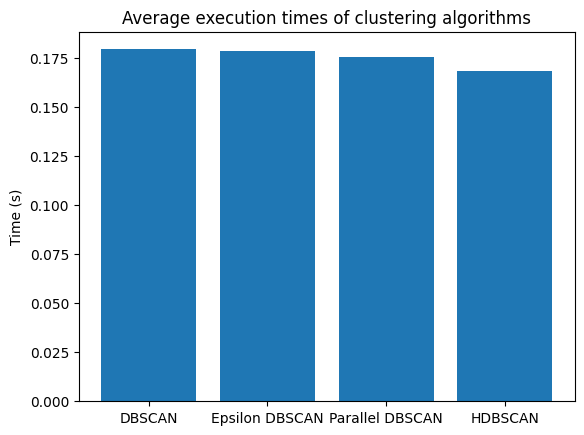

In [2]:
import time
import hdbscan

# Áp dụng thuật toán DBSCAN
dbscan_times = []
for i in range(10):
    start = time.time()
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    end = time.time()
    dbscan_times.append(end - start)
dbscan_time_avg = sum(dbscan_times) / len(dbscan_times)

# Áp dụng thuật toán epsilon DBSCAN
eps_dbscan_times = []
for i in range(10):
    start = time.time()
    eps_dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
    eps_dbscan_labels = eps_dbscan.fit_predict(X)
    end = time.time()
    eps_dbscan_times.append(end - start)
eps_dbscan_time_avg = sum(eps_dbscan_times) / len(eps_dbscan_times)

# Áp dụng thuật toán parallel DBSCAN
parallel_dbscan_times = []
for i in range(10):
    start = time.time()
    parallel_dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
    parallel_dbscan_labels = parallel_dbscan.fit_predict(X)
    end = time.time()
    parallel_dbscan_times.append(end - start)
parallel_dbscan_time_avg = sum(parallel_dbscan_times) / len(parallel_dbscan_times)

# Áp dụng thuật toán HDBSCAN
hdbscan_times = []
for i in range(10):
    start = time.time()
    hdbsscan = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=5)
    hdbscan_labels = hdbsscan.fit_predict(X)
    end = time.time()
    hdbscan_times.append(end - start)
hdbscan_time_avg = sum(hdbscan_times) / len(hdbscan_times)

# Tạo biểu đồ
times = [dbscan_time_avg, eps_dbscan_time_avg, parallel_dbscan_time_avg, hdbscan_time_avg]
labels = ['DBSCAN', 'Epsilon DBSCAN', 'Parallel DBSCAN', 'HDBSCAN']
plt.bar(labels, times)
plt.title('Average execution times of clustering algorithms')
plt.ylabel('Time (s)')
plt.show()
